# Day 7

## Part 1

- a beam enters at the location `S`
- beams always travel downwards
- `^`s split the beam into 2 new downward beams immediately to the left/right
- How many splits occur


*not super clear about what a "split" means honestly as the example isn't exactly clear. Let's play around with it a bit and see...*

In [29]:
from copy import deepcopy
import logging
from pathlib import Path

from tqdm import tqdm
from matplotlib import pyplot as plt

from advent_of_code_utils.advent_of_code_utils import (
    parse_from_file,
    ParseConfig as PC,
    markdown,
    plot_str_grid,
)

log = logging.getLogger("advent")
logging.basicConfig(level=logging.INFO)


parser = PC("\n", PC("", str))
grid = parse_from_file(Path("day_7_example.txt"), parser)

INFO:advent_of_code_utils.py:16 items loaded from "day_7_example.txt"


Text(0.5, 1.0, 'Oh tacheon-baum')

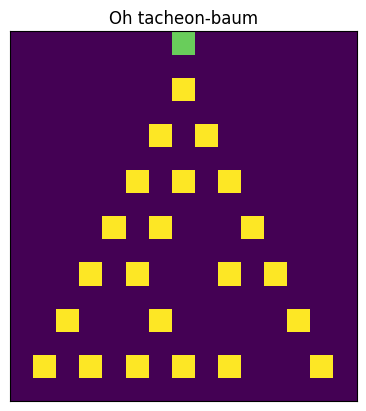

In [30]:
fig, ax = plt.subplots()
plot_str_grid(grid, ax, equal_axes=True)
ax.set_title("Oh tacheon-baum")

INFO:advent:split_count=42


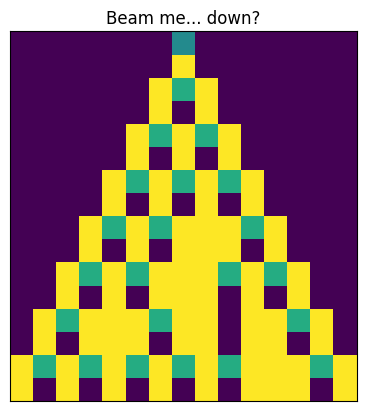

In [31]:
BEAM = "|"
SPLITTER = "^"
START = "S"

split_count = 0
for l, line in enumerate(grid[1:], start=1):
    for c, value in enumerate(line):
        # look at the line above and see where the beams are
        above = grid[l-1][c]
        if value == SPLITTER and above == BEAM:
            if c > 0:
                grid[l][c - 1] = BEAM
                split_count += 1
            if c < len(line) - 1:
                grid[l][c + 1] = BEAM
                split_count += 1
        elif above == START or above == BEAM:
            grid[l][c] = BEAM

fig, ax = plt.subplots()
plot_str_grid(grid, ax, equal_axes=True)
ax.set_title("Beam me... down?")
log.info(f"{split_count=}")

ok that's double the number - which might be a conincidence but could also just be how to solve it. Let's try just halving tihs vlaue for the real deal

INFO:advent_of_code_utils.py:142 items loaded from "day_7.txt"


Text(0.5, 1.0, 'The full picture')

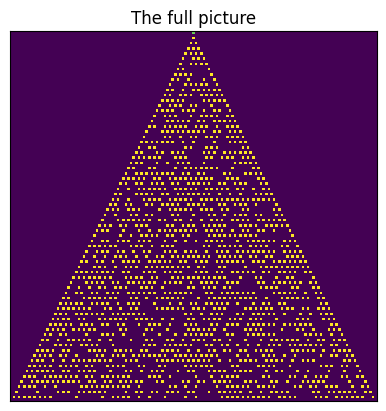

In [32]:
grid = parse_from_file(Path("day_7.txt"), parser)

fig, ax = plt.subplots()
plot_str_grid(grid, ax, equal_axes=True)
ax.set_title("The full picture")

INFO:advent:split_count=3036


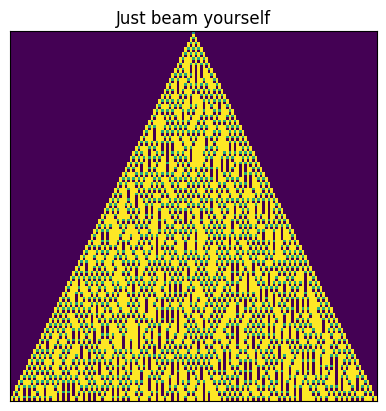

In [33]:
split_count = 0
for l, line in enumerate(grid[1:], start=1):
    for c, value in enumerate(line):
        # look at the line above and see where the beams are
        above = grid[l-1][c]
        if value == SPLITTER and above == BEAM:
            if c > 0:
                grid[l][c - 1] = BEAM
                split_count += 1
            if c < len(line) - 1:
                grid[l][c + 1] = BEAM
                split_count += 1
        elif above == START or above == BEAM:
            grid[l][c] = BEAM

fig, ax = plt.subplots()
plot_str_grid(grid, ax, equal_axes=True)
ax.set_title("Just beam yourself")
log.info(f"{split_count=}")

In [34]:
markdown(f"The number of splits is {split_count//2}")

The number of splits is 1518

actually this could be a nice gif - let's do it once more capturing every step

In [39]:
from advent_of_code_utils.advent_of_code_utils import (
    create_gif, embed_image
)

from copy import deepcopy

In [40]:

grid = parse_from_file(Path("day_7.txt"), parser)

frames = [deepcopy(grid)]

split_count = 0
for l, line in enumerate(grid[1:], start=1):
    for c, value in enumerate(line):
        # look at the line above and see where the beams are
        above = grid[l-1][c]
        if value == SPLITTER and above == BEAM:
            if c > 0:
                grid[l][c - 1] = BEAM
                split_count += 1
            if c < len(line) - 1:
                grid[l][c + 1] = BEAM
                split_count += 1
        elif above == START or above == BEAM:
            grid[l][c] = BEAM
    frames.append(deepcopy(grid))

def plot_func(frame, ax):
    plot_str_grid(frame, ax, equal_axes=True)

gif_path = create_gif(
    frames,
    plot_func,
    "day_7.gif",
    frame_duration_ms=100,
    title="Day 7",
    append_iteration=True,
)

INFO:advent_of_code_utils.py:142 items loaded from "day_7.txt"
INFO:advent_of_code_utils.py:Creating 142 frame images using "plot_func()"
generating frames: 100%|██████████| 142/142 [00:07<00:00, 17.86it/s]
INFO:advent_of_code_utils.py:142 images saved to "img_temp"
INFO:advent_of_code_utils.py:Creating "day_7.gif" with frame duration 100ms, repeat=True
INFO:advent_of_code_utils.py:"day_7.gif" saved!
INFO:advent_of_code_utils.py:"img_temp" cleaned up


INFO:advent_of_code_utils.py:Embedding "day_7.gif"


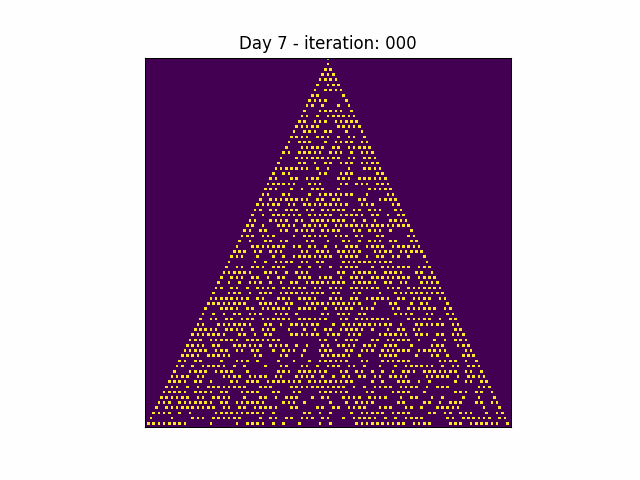

In [41]:
embed_image(gif_path)